py -3.11 -m venv .venv  
pip install numpy matplotlib tensorflow scikit-learn seaborn

# Numbers

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.regularizers import l2

In [17]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Dataset obsahuje 70000 obrázků


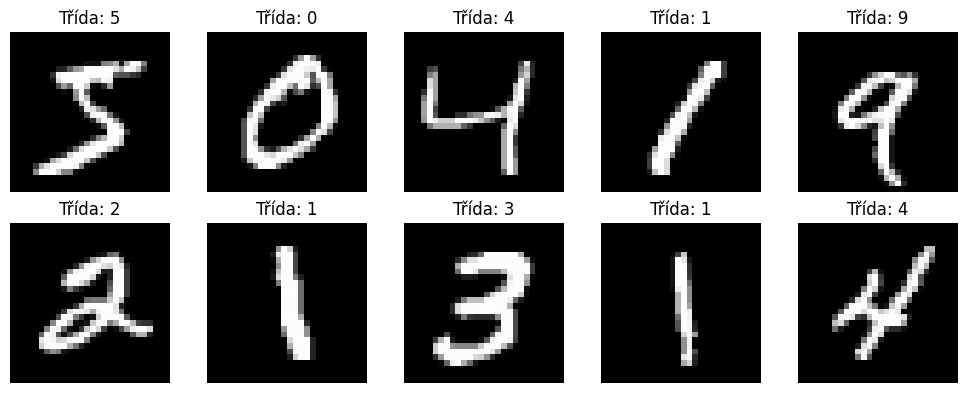

Počet obrázků v každé třídě:
0: 6903
1: 7877
2: 6990
3: 7141
4: 6824
5: 6313
6: 6876
7: 7293
8: 6825
9: 6958


In [18]:
# Spojení dat kvůli následnému vlastnímu rozdělení
X = np.concatenate([X_train, X_test], axis=0)
y = np.concatenate([y_train, y_test], axis=0)

print(f"Dataset obsahuje {X.shape[0]} obrázků")

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i], cmap='gray')
    plt.title(f"Třída: {y[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

counter = Counter(y)
print("Počet obrázků v každé třídě:")
for label, count in sorted(counter.items()):
    print(f"{label}: {count}")

In [19]:
unique_shapes = {img.shape for img in X}
print("Unikátní velikosti obrázků:", unique_shapes)

Unikátní velikosti obrázků: {(28, 28)}


In [20]:
X = X.astype("float32") / 255.0

X = np.expand_dims(X, axis=-1)

y_cat = to_categorical(y, num_classes=10)

X_temp, X_test, y_temp, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=np.argmax(y_temp, axis=1))


print(f"Trénovací sada: {X_train.shape[0]} vzorků")
print(f"Validační sada: {X_val.shape[0]} vzorků")
print(f"Testovací sada: {X_test.shape[0]} vzorků")

Trénovací sada: 42000 vzorků
Validační sada: 14000 vzorků
Testovací sada: 14000 vzorků


In [21]:
model = Sequential()

# Konvoluční blok 1
# slouží k detekci základních rysů v obraze
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# snižuje rozměry výstupu z předchozí vrstvy
model.add(MaxPooling2D(pool_size=(2, 2)))

# Konvoluční blok 2
# zaměřuje na složitější kombinace znaků
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# snižuje rozměry výstupu z předchozí vrstvy
model.add(MaxPooling2D(pool_size=(2, 2)))

# Převedení na 1D vektor
model.add(Flatten())

# Skrytá hustá vrstva
# vrstva zajišťuje, že síť se naučí kombinace znaků detekovaných konvolučními vrstvami
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout kvůli přeučení

# Výstupní vrstva (klasifikace do 10 tříd)
model.add(Dense(10, activation='softmax'))

model.summary()

d:\Skola\semester8\Analyza_signalu2\ukoly\ukol5\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    epochs=15,
                    batch_size=128,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop])

Epoch 1/15
329/329 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.7566 - loss: 0.7799 - val_accuracy: 0.9701 - val_loss: 0.0991
Epoch 2/15
329/329 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9632 - loss: 0.1218 - val_accuracy: 0.9805 - val_loss: 0.0633
Epoch 3/15
329/329 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9749 - loss: 0.0885 - val_accuracy: 0.9820 - val_loss: 0.0589
Epoch 4/15
329/329 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.9798 - loss: 0.0664 - val_accuracy: 0.9857 - val_loss: 0.0467
Epoch 5/15
329/329 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.9838 - loss: 0.0545 - val_accuracy: 0.9861 - val_loss: 0.0456
Epoch 6/15
329/329 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9832 - loss: 0.0552 - val_accuracy: 0.9854 - val_loss: 0.0504
Epoch 7/15
329/329 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9876 - loss: 0.0388 - val_accuracy: 0.9876 - val_loss: 0.0421
Epoch 8/15
329/329 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9875 - loss: 0.0371 - val_ac

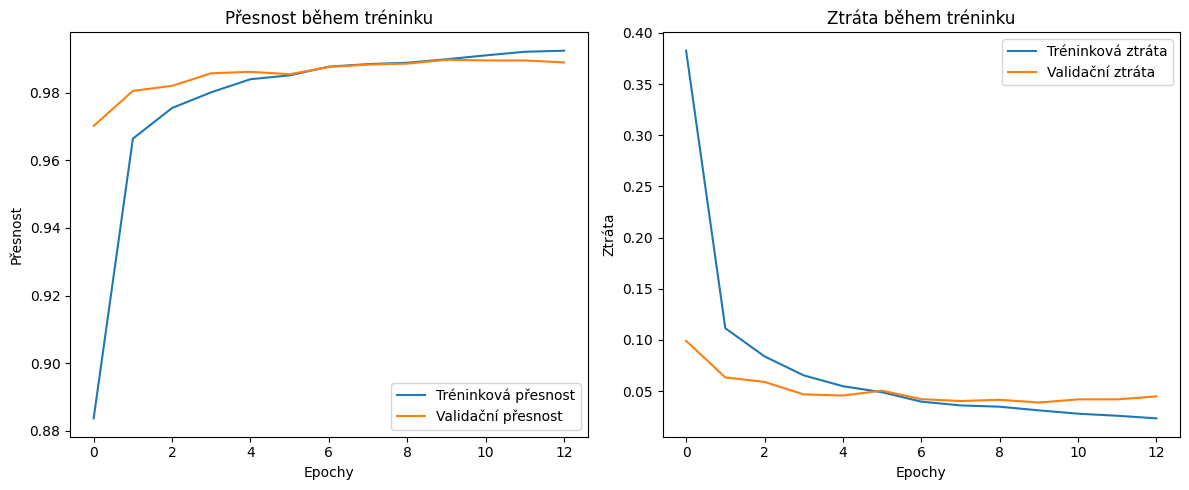

In [23]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Tréninková přesnost')
plt.plot(history.history['val_accuracy'], label='Validační přesnost')
plt.title('Přesnost během tréninku')
plt.xlabel('Epochy')
plt.ylabel('Přesnost')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Tréninková ztráta')
plt.plot(history.history['val_loss'], label='Validační ztráta')
plt.title('Ztráta během tréninku')
plt.xlabel('Epochy')
plt.ylabel('Ztráta')
plt.legend()

plt.tight_layout()
plt.show()


438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Klasifikační report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1381
           1       0.99      0.99      0.99      1575
           2       0.99      0.99      0.99      1398
           3       0.99      0.99      0.99      1428
           4       0.99      0.99      0.99      1365
           5       0.99      0.99      0.99      1263
           6       0.99      0.99      0.99      1375
           7       0.99      0.99      0.99      1459
           8       0.99      0.99      0.99      1365
           9       0.99      0.98      0.98      1391

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000



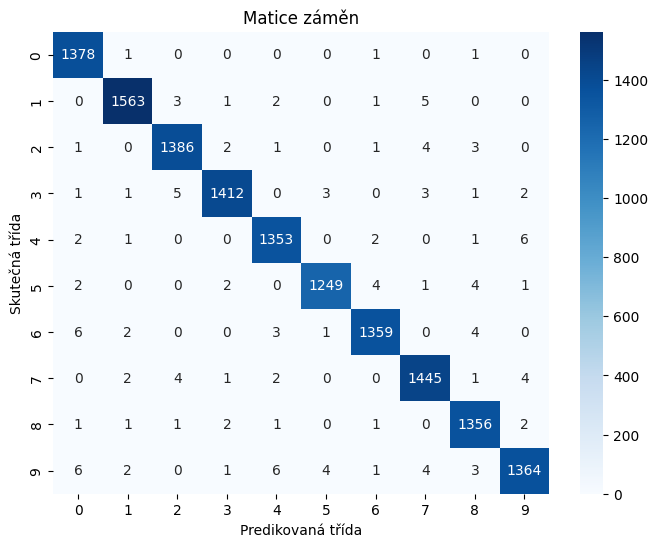

In [24]:
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = np.argmax(y_test, axis=1)

print("Klasifikační report:")
print(classification_report(y_true, y_pred))

conf_mat = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Matice záměn')
plt.xlabel('Predikovaná třída')
plt.ylabel('Skutečná třída')
plt.show()

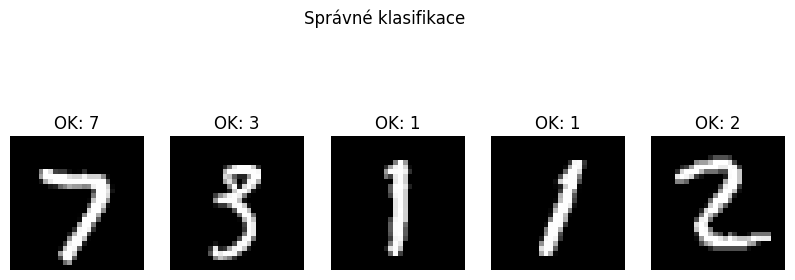

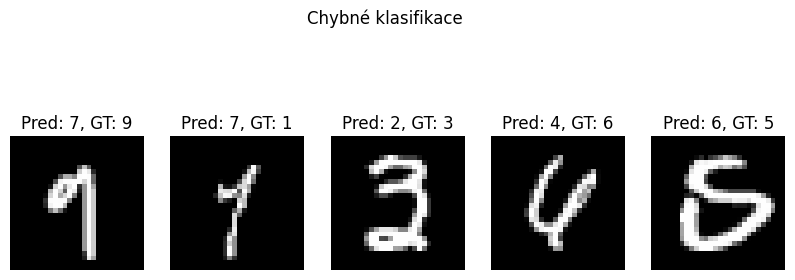

In [25]:
# Správně klasifikované
correct = np.where(y_pred == y_true)[0]
incorrect = np.where(y_pred != y_true)[0]

# 🟩 Správně klasifikované obrázky
plt.figure(figsize=(10, 4))
for i, idx in enumerate(correct[:5]):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"OK: {y_pred[idx]}")
    plt.axis("off")
plt.suptitle("Správné klasifikace")
plt.show()

# 🟥 Chybně klasifikované obrázky
plt.figure(figsize=(10, 4))
for i, idx in enumerate(incorrect[:5]):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred[idx]}, GT: {y_true[idx]}")
    plt.axis("off")
plt.suptitle("Chybné klasifikace")
plt.show()


In [26]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(0.0001), input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stop]
)

print("✅ Val accuracy (combo 1 – konzervativní):", max(history.history['val_accuracy']))


Epoch 1/15


d:\Skola\semester8\Analyza_signalu2\ukoly\ukol5\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.7296 - loss: 0.9755 - val_accuracy: 0.9306 - val_loss: 0.2761
Epoch 2/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.9064 - loss: 0.3434 - val_accuracy: 0.9483 - val_loss: 0.2076
Epoch 3/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9287 - loss: 0.2687 - val_accuracy: 0.9550 - val_loss: 0.1759
Epoch 4/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.9426 - loss: 0.2257 - val_accuracy: 0.9615 - val_loss: 0.1560
Epoch 5/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9498 - loss: 0.1995 - val_accuracy: 0.9659 - val_loss: 0.1402
Epoch 6/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9550 - loss: 0.1798 - val_accuracy: 0.9704 - val_loss: 0.1295
Epoch 7/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9614 - loss: 0.1572 - val_accuracy: 0.9731 - val_loss: 0.1188
Epoch 8/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9632 - loss: 0.15

In [27]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stop]
)

print("✅ Val accuracy (combo 2 – rovnovážné):", max(history.history['val_accuracy']))


Epoch 1/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8119 - loss: 0.7692 - val_accuracy: 0.9591 - val_loss: 0.2768
Epoch 2/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9432 - loss: 0.3273 - val_accuracy: 0.9694 - val_loss: 0.2286
Epoch 3/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9527 - loss: 0.2862 - val_accuracy: 0.9742 - val_loss: 0.2126
Epoch 4/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9594 - loss: 0.2655 - val_accuracy: 0.9716 - val_loss: 0.2114
Epoch 5/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9648 - loss: 0.2399 - val_accuracy: 0.9762 - val_loss: 0.1995
Epoch 6/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9641 - loss: 0.2365 - val_accuracy: 0.9780 - val_loss: 0.1855
Epoch 7/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9644 - loss: 0.2319 - val_accuracy: 0.9784 - val_loss: 0.1834
Epoch 8/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9668 - loss: 0.2203 - val_acc

In [28]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=256,
    validation_data=(X_val, y_val),
    callbacks=[early_stop]
)

print("✅ Val accuracy (combo 3 – agresivní):", max(history.history['val_accuracy']))


Epoch 1/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.7671 - loss: 1.4740 - val_accuracy: 0.8059 - val_loss: 1.0044
Epoch 2/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.8717 - loss: 0.8908 - val_accuracy: 0.9268 - val_loss: 0.6590
Epoch 3/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.8998 - loss: 0.7163 - val_accuracy: 0.9409 - val_loss: 0.5483
Epoch 4/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9062 - loss: 0.6773 - val_accuracy: 0.9461 - val_loss: 0.5405
Epoch 5/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9114 - loss: 0.6625 - val_accuracy: 0.9331 - val_loss: 0.5604
Epoch 6/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.8979 - loss: 0.7520 - val_accuracy: 0.9480 - val_loss: 0.5067
Epoch 7/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.9142 - loss: 0.6267 - val_accuracy: 0.9560 - val_loss: 0.4954
Epoch 8/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9126 - loss: 0.6241 - val_accu